# LOAD PACKAGES

In [1]:
# pip install pandas-profiling

In [1]:
# Load necessary libraries

import os
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
from scipy.stats import norm
import pandas_profiling

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# LOAD DATA

In [5]:
house_pricing_df = pd.read_csv('nyc-rolling-sales.csv', parse_dates=['SALE DATE'])

# DESCRIBE DATA

In [4]:
#house_pricing_df.profile_report()

In [5]:
#house_pricing_profile = house_pricing_df.profile_report(title='Pandas Profiling Report')
#house_pricing_profile.to_file(output_file="NYC Sales Data Profiling.html")

In [6]:
house_pricing_df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
house_pricing_df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [8]:
house_pricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [9]:
print(('rows,columns'))
print(house_pricing_df.shape)

rows,columns
(84548, 22)


**CHECKING FOR NULL**

In [10]:
print(house_pricing_df.isnull().sum())

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


In [11]:
house_pricing_df.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [12]:
house_pricing_df.notnull().sum()

Unnamed: 0                        84548
BOROUGH                           84548
NEIGHBORHOOD                      84548
BUILDING CLASS CATEGORY           84548
TAX CLASS AT PRESENT              84548
BLOCK                             84548
LOT                               84548
EASE-MENT                         84548
BUILDING CLASS AT PRESENT         84548
ADDRESS                           84548
APARTMENT NUMBER                  84548
ZIP CODE                          84548
RESIDENTIAL UNITS                 84548
COMMERCIAL UNITS                  84548
TOTAL UNITS                       84548
LAND SQUARE FEET                  84548
GROSS SQUARE FEET                 84548
YEAR BUILT                        84548
TAX CLASS AT TIME OF SALE         84548
BUILDING CLASS AT TIME OF SALE    84548
SALE PRICE                        84548
SALE DATE                         84548
dtype: int64

Upon checking the dataframe awhile ago, we saw some NANs or NULLs but isnull returned 0 values for all columns. This doesn't mean that the data is clean though. We need to check if all columns are in the right format. 

In [13]:
house_pricing_df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [14]:
house_pricing_df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [15]:
numcol = []

In [16]:
catcol = []

**Unnamed: 0** 

In [17]:
house_pricing_df['Unnamed: 0'].unique()

array([    4,     5,     6, ..., 26737, 26738, 26739], dtype=int64)

In [18]:
house_pricing_df['Unnamed: 0'].value_counts()

2047     5
5475     5
1569     5
3616     5
5603     5
        ..
24488    1
24857    1
25611    1
24568    1
24453    1
Name: Unnamed: 0, Length: 26736, dtype: int64

Unnamed: 0 has no definition in the dictionary so we will drop this column

In [19]:
house_pricing_df = house_pricing_df.drop('Unnamed: 0', axis=1)

In [20]:
house_pricing_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


**BOROUGH** - categorical

In [21]:
house_pricing_df.BOROUGH.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [22]:
house_pricing_df.BOROUGH.value_counts()

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

In [23]:
print(len(house_pricing_df[house_pricing_df['BOROUGH'] == ' ']))
print(len(house_pricing_df[house_pricing_df['BOROUGH'] == '0']))

0
0


Borough = digit code where the property is located in. 1: Manhattan, 2: Bronx, 3: Brooklyn, 4: Queen, 5: Staten Island. Since Borough is categorixal, it is better to change the values into its location. 

In [24]:
house_pricing_df['BOROUGH'] = house_pricing_df.BOROUGH.map({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens',5:'Staten Island'})

You can also do it individually:

house_pricing_df['BOROUGH']house_insurance_df['BOROUGH'] == 1] = 'Manhattan'
house_pricing_df['BOROUGH']house_insurance_df['BOROUGH'] == 2] = 'Bronx'
house_pricing_df['BOROUGH']house_insurance_df['BOROUGH'] == 3] = 'Brooklyn'
house_pricing_df['BOROUGH']house_insurance_df['BOROUGH'] == 4] = 'Queens'
house_pricing_df['BOROUGH']house_insurance_df['BOROUGH'] == 5] = 'Staten Island'

In [25]:
house_pricing_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


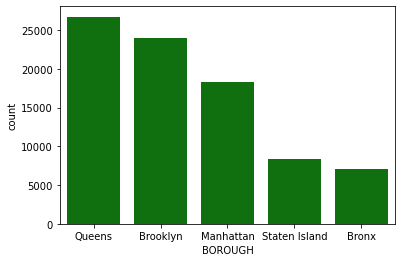

In [26]:
sns.countplot(data=house_pricing_df, x='BOROUGH',order=house_pricing_df['BOROUGH'].value_counts(ascending=False).index, color="green")

In [27]:
catcol.append('BOROUGH')

**NEIGHBORHOOD** - categorical

In [28]:
house_pricing_df.NEIGHBORHOOD.value_counts()

FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
PELHAM BAY                     1
BRONX PARK                     1
EAST RIVER                     1
CITY ISLAND-PELHAM STRIP       1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

In [29]:
print(len(house_pricing_df[house_pricing_df['NEIGHBORHOOD'] == ' ']))
print(len(house_pricing_df[house_pricing_df['NEIGHBORHOOD'] == '0']))

0
0


In [30]:
house_pricing_df.NEIGHBORHOOD.unique()

array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
       'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
       'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
       'MIDTOWN EAST', 'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS',
       'MURRAY HILL', 'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE',
       'TRIBECA', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER EAST SIDE (96-110)', 'UPPER WEST SIDE (59-79)',
       'UPPER WEST SIDE (79-96)', 'UPPER WEST SIDE (96-116)',
       'WASHINGTON HEIGHTS LOWER', 'WASHINGTON HEIGHTS UPPER', 'BATHGATE',
       'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT', 'BRONX PARK',
       'BRONXDALE', 'CASTLE HILL/UNIONPORT', 'CITY ISLAND',
       'CITY ISLAND-PELHAM STRIP', 'CO-OP CITY', 'COUNTRY CLUB',
     

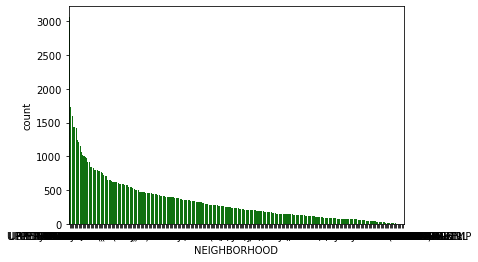

In [31]:
sns.countplot(data=house_pricing_df, x='NEIGHBORHOOD',order=house_pricing_df['NEIGHBORHOOD'].value_counts(ascending=False).index, color="green")

In [32]:
catcol.append('NEIGHBORHOOD')

**BUILDING CLASS CATEGORY** - categorical

In [33]:
house_pricing_df['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

In [34]:
print(len(house_pricing_df[house_pricing_df['BUILDING CLASS CATEGORY'] == ' ']))
print(len(house_pricing_df[house_pricing_df['BUILDING CLASS CATEGORY'] == '0']))

0
0


In [35]:
catcol.append('BUILDING CLASS CATEGORY')

**TAX CLASS AT PRESENT** - categorical

In [36]:
house_pricing_df['TAX CLASS AT PRESENT'].value_counts()

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [37]:
tcap1 = len(house_pricing_df[house_pricing_df['TAX CLASS AT PRESENT'] ==  '1']) / len(house_pricing_df)
tcap2 = len(house_pricing_df[house_pricing_df['TAX CLASS AT PRESENT'] == '2']) / len(house_pricing_df)

print('PERCENTAGE OF TAX CLASS 1 AND 2')
print('TAX CLASS 1: ', (tcap1)*100, '%')
print('TAX CLASS 2: ', (tcap2)*100, '%')

PERCENTAGE OF TAX CLASS 1 AND 2
TAX CLASS 1:  45.6935705161565 %
TAX CLASS 2:  36.56975919004589 %


Most houses are under tax class 1 or 2.

In [38]:
print(len(house_pricing_df[house_pricing_df['TAX CLASS AT PRESENT'] == ' ']))
print(len(house_pricing_df[house_pricing_df['TAX CLASS AT PRESENT'] == '0']))

738
0


There are 738 cases with missing tax classes. 

In [39]:
catcol.append('TAX CLASS AT PRESENT')

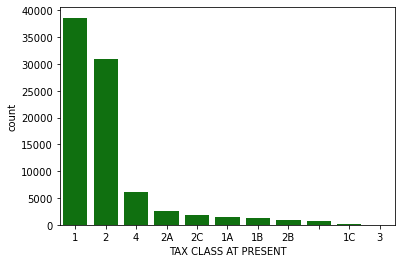

In [40]:
sns.countplot(data=house_pricing_df, x='TAX CLASS AT PRESENT',order=house_pricing_df['TAX CLASS AT PRESENT'].value_counts(ascending=False).index, color="green")

**BLOCK** - numerical

In [41]:
house_pricing_df['BLOCK'].value_counts()

5066     404
16       255
2135     211
4978     187
1171     181
        ... 
15651      1
1316       1
7527       1
7591       1
2047       1
Name: BLOCK, Length: 11566, dtype: int64

In [42]:
numcol.append('BLOCK')

In [43]:
print(len(house_pricing_df[house_pricing_df['BLOCK'] == ' ']))
print(len(house_pricing_df[house_pricing_df['BLOCK'] == 0]))

0
0


**LOT** - numerical

In [44]:
house_pricing_df['LOT'].value_counts()

1       4125
20       983
12       972
40       935
23       911
        ... 
2321       1
4124       1
2257       1
2100       1
1746       1
Name: LOT, Length: 2627, dtype: int64

In [45]:
numcol.append('LOT')

In [46]:
print(len(house_pricing_df[house_pricing_df['LOT'] == ' ']))
print(len(house_pricing_df[house_pricing_df['LOT'] == 0]))

0
0


**EASE-MENT**

In [47]:
house_pricing_df['EASE-MENT'].value_counts()

     84548
Name: EASE-MENT, dtype: int64

In [48]:
house_pricing_df['EASE-MENT'].unique()

array([' '], dtype=object)

EASE-MENT has no contribution in the data as all columns are null, so we can drop this column. 

In [49]:
house_pricing_df = house_pricing_df.drop('EASE-MENT', axis=1)
#another approach is 
#del house_pricing_df['EASE-MENT']

In [50]:
house_pricing_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


**BUILDING CLASS AT PRESENT** - categorical

In [51]:
house_pricing_df['BUILDING CLASS AT PRESENT'].value_counts()

D4    12663
R4    12482
A1     6753
A5     5683
B2     4923
      ...  
HS        1
HH        1
Y1        1
Z7        1
P7        1
Name: BUILDING CLASS AT PRESENT, Length: 167, dtype: int64

In [52]:
print(len(house_pricing_df[house_pricing_df['BUILDING CLASS AT PRESENT'] == ' ']))
print(len(house_pricing_df[house_pricing_df['BUILDING CLASS AT PRESENT'] == '0']))

738
0


There are 738 cases with missing values of building classes same as tax classes. 

In [53]:
catcol.append('BUILDING CLASS AT PRESENT')

**ADDRESS** 

In [54]:
house_pricing_df['ADDRESS'].value_counts()

131-05 40TH   ROAD        210
429 KENT AVENUE           158
169 WEST 95TH   STREET    153
131-03 40TH   ROAD        147
265 STATE STREET          127
                         ... 
34 CALCAGNO COURT           1
140-03 115TH AVENUE         1
84-19 51ST AVENUE, 1E       1
2852 GERRITSEN AVENUE       1
81 SAINT MARKS PLACE        1
Name: ADDRESS, Length: 67563, dtype: int64

In [55]:
print(len(house_pricing_df[house_pricing_df['ADDRESS'] == ' ']))
print(len(house_pricing_df[house_pricing_df['ADDRESS'] == '0']))

0
0


**APARTMENT NUMBER**

In [56]:
house_pricing_df['APARTMENT NUMBER'].value_counts()

         65496
4          298
3A         295
3B         275
2          275
         ...  
TH-C2        1
642          1
44-C         1
8EE          1
S16          1
Name: APARTMENT NUMBER, Length: 3989, dtype: int64

In [57]:
print(len(house_pricing_df[house_pricing_df['APARTMENT NUMBER'] == ' ']))
print(len(house_pricing_df[house_pricing_df['APARTMENT NUMBER'] == '0']))

65496
1


There are 65,496 cases with no apartment numbers and 1 case with 0 as its apartment number. Let's drop this column as it will not contribute any information in our analysis.

In [58]:
house_pricing_df = house_pricing_df.drop('APARTMENT NUMBER', axis=1)


**ZIP CODE**

In [59]:
house_pricing_df['ZIP CODE'].value_counts()

10314    1687
11354    1384
11201    1324
11235    1312
11234    1165
         ... 
10105       5
10281       1
10167       1
10803       1
11430       1
Name: ZIP CODE, Length: 186, dtype: int64

In [60]:
house_pricing_df['ZIP CODE'].unique()

array([10009,     0, 10002, 10011, 10001, 10014, 10010, 10013, 10038,
       10007, 10036, 10019, 10018, 10003, 10005, 10004, 10006, 10016,
       10012, 10026, 10030, 10031, 10027, 10035, 10037, 10029, 10039,
       10032, 10128, 10463, 10034, 10025, 10022, 10017, 10167, 10023,
       10105, 10033, 10044, 10280, 10282, 10281, 10065, 10021, 10075,
       10028, 10024, 10069, 10040, 10457, 10458, 10451, 10456, 10469,
       10466, 10475, 10468, 10467, 10460, 10473, 10472, 10464, 10462,
       10803, 10465, 10459, 10471, 10453, 10452, 10454, 10474, 10455,
       10461, 10470, 11228, 11214, 11220, 11209, 11219, 11221, 11233,
       11213, 11206, 11216, 11205, 11238, 11226, 11204, 11234, 11217,
       11201, 11218, 11232, 11230, 11235, 11212, 11237, 11207, 11236,
       11239, 11231, 11249, 11224, 11225, 11208, 11210, 11203, 11229,
       11215, 11223, 11222, 11211, 11370, 11691, 11692, 11102, 11106,
       11103, 11377, 11105, 11101, 11361, 11360, 11357, 11358, 11364,
       11693, 11694,

In [61]:
print(len(house_pricing_df[house_pricing_df['ZIP CODE'] == ' ']))
print(len(house_pricing_df[house_pricing_df['ZIP CODE'] == 0]))

0
982


There are 982 cases where ZIP code is 0 and we will drop these data.

In [62]:
house_pricing_df = house_pricing_df.drop(house_pricing_df[house_pricing_df['ZIP CODE']==0].index)

In [63]:
house_pricing_df['ZIP CODE'].unique()

array([10009, 10002, 10011, 10001, 10014, 10010, 10013, 10038, 10007,
       10036, 10019, 10018, 10003, 10005, 10004, 10006, 10016, 10012,
       10026, 10030, 10031, 10027, 10035, 10037, 10029, 10039, 10032,
       10128, 10463, 10034, 10025, 10022, 10017, 10167, 10023, 10105,
       10033, 10044, 10280, 10282, 10281, 10065, 10021, 10075, 10028,
       10024, 10069, 10040, 10457, 10458, 10451, 10456, 10469, 10466,
       10475, 10468, 10467, 10460, 10473, 10472, 10464, 10462, 10803,
       10465, 10459, 10471, 10453, 10452, 10454, 10474, 10455, 10461,
       10470, 11228, 11214, 11220, 11209, 11219, 11221, 11233, 11213,
       11206, 11216, 11205, 11238, 11226, 11204, 11234, 11217, 11201,
       11218, 11232, 11230, 11235, 11212, 11237, 11207, 11236, 11239,
       11231, 11249, 11224, 11225, 11208, 11210, 11203, 11229, 11215,
       11223, 11222, 11211, 11370, 11691, 11692, 11102, 11106, 11103,
       11377, 11105, 11101, 11361, 11360, 11357, 11358, 11364, 11693,
       11694, 11426,

In [64]:
len(house_pricing_df[house_pricing_df['ZIP CODE'] == 0])

0

In [65]:
catcol.append('ZIP CODE')

**RESIDENTIAL UNITS** - numerical

In [66]:
house_pricing_df['RESIDENTIAL UNITS'].value_counts()

1      34693
0      23840
2      16039
3       4608
4       1346
       ...  
164        1
420        1
165        1
550        1
283        1
Name: RESIDENTIAL UNITS, Length: 176, dtype: int64

In [67]:
print(len(house_pricing_df[house_pricing_df['RESIDENTIAL UNITS'] == ' ']))
print(len(house_pricing_df[house_pricing_df['RESIDENTIAL UNITS'] == 0]))

0
23840


There are 23,840 cases with 0 residential unit values. 

In [68]:
numcol.append('RESIDENTIAL UNITS')

**COMMERCIAL UNITS** - numerical

In [69]:
house_pricing_df['COMMERCIAL UNITS'].value_counts()

0       78455
1        3552
2         816
3         258
4         137
5          74
6          70
7          31
8          26
9          20
10         17
12         12
15         11
11         10
17          6
14          6
254         4
13          4
35          4
20          4
19          3
42          3
22          3
18          3
422         2
436         2
26          2
25          2
16          2
126         2
73          1
67          1
318         1
147         1
2261        1
62          1
59          1
184         1
56          1
55          1
52          1
51          1
49          1
172         1
38          1
34          1
32          1
31          1
30          1
28          1
91          1
27          1
24          1
21          1
23          1
Name: COMMERCIAL UNITS, dtype: int64

In [70]:
len(house_pricing_df[house_pricing_df['COMMERCIAL UNITS'] == 0])

78455

In [71]:
len(house_pricing_df[house_pricing_df['COMMERCIAL UNITS'] == ' '])

0

There are 78455 cases with 0 commercial unit values. 

In [72]:
numcol.append('COMMERCIAL UNITS')

**TOTAL UNITS** - numerical

In [73]:
house_pricing_df['TOTAL UNITS'].value_counts()

1      38322
0      18826
2      15904
3       5410
4       1498
       ...  
420        1
165        1
551        1
104        1
92         1
Name: TOTAL UNITS, Length: 192, dtype: int64

In [74]:
len(house_pricing_df[house_pricing_df['TOTAL UNITS'] == 0])

18826

In [75]:
len(house_pricing_df[house_pricing_df['TOTAL UNITS'] == ''])

0

There are 18826 cases with 0 total unit values. 

In [76]:
numcol.append('TOTAL UNITS')

**LAND SQUARE FEET** - numerical

In [77]:
house_pricing_df['LAND SQUARE FEET'].value_counts()

 -       26019
0        10118
2000      3875
2500      3450
4000      3016
         ...  
209          1
4374         1
13891        1
4781         1
6215         1
Name: LAND SQUARE FEET, Length: 5957, dtype: int64

There are NA and 0 values. 

In [78]:
numcol.append('LAND SQUARE FEET')

**GROSS SQUARE FEET** - numerical

In [79]:
house_pricing_df['GROSS SQUARE FEET'].value_counts()

 -       27024
0        11038
2400       386
1800       360
2000       359
         ...  
32190        1
2333         1
1103         1
14401        1
11825        1
Name: GROSS SQUARE FEET, Length: 5689, dtype: int64

There are NA and 0 values. 

In [80]:
numcol.append('GROSS SQUARE FEET')

**YEAR BUILT** - categorical

In [81]:
house_pricing_df['YEAR BUILT'].value_counts()

1920    6045
0       6041
1930    5043
1925    4312
1910    3585
        ... 
1832       1
1849       1
1829       1
1111       1
1888       1
Name: YEAR BUILT, Length: 158, dtype: int64

In [82]:
print(len(house_pricing_df[house_pricing_df['YEAR BUILT'] == ' ']))
print(len(house_pricing_df[house_pricing_df['YEAR BUILT'] == 0]))

0
6041


There are 0 values as years and we will drop these data

In [83]:
house_pricing_df = house_pricing_df.drop(house_pricing_df[house_pricing_df['YEAR BUILT']==0].index)

In [84]:
house_pricing_df['YEAR BUILT'].value_counts()

1920    6045
1930    5043
1925    4312
1910    3585
1950    3150
        ... 
1832       1
1680       1
1829       1
1888       1
1855       1
Name: YEAR BUILT, Length: 157, dtype: int64

In [85]:
catcol.append('YEAR BUILT')

**TAX CLASS AT TIME OF SALE** - categorical

In [86]:
house_pricing_df['TAX CLASS AT TIME OF SALE'].value_counts()

1    39888
2    32883
4     4754
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [87]:
print(len(house_pricing_df[house_pricing_df['TAX CLASS AT TIME OF SALE'] == ' ']))
print(len(house_pricing_df[house_pricing_df['TAX CLASS AT TIME OF SALE'] == '0']))

0
0


In [88]:
catcol.append('TAX CLASS AT TIME OF SALE')

**BUILDING CLASS AT TIME OF SALE** - categorical

In [89]:
house_pricing_df['BUILDING CLASS AT TIME OF SALE'].value_counts()

D4    12666
R4     9883
A1     6750
A5     5670
B2     4909
      ...  
HS        1
M2        1
HH        1
J1        1
Q8        1
Name: BUILDING CLASS AT TIME OF SALE, Length: 157, dtype: int64

In [90]:
print(len(house_pricing_df[house_pricing_df['BUILDING CLASS AT TIME OF SALE'] == ' ']))
print(len(house_pricing_df[house_pricing_df['BUILDING CLASS AT TIME OF SALE'] == '0']))

0
0


In [91]:
catcol.append('BUILDING CLASS AT TIME OF SALE')

**SALE PRICE** - numerical

In [92]:
house_pricing_df['SALE PRICE'].value_counts()

 -         12974
0           9145
10           697
450000       406
600000       393
           ...  
1849281        1
424500         1
198744         1
994168         1
17241          1
Name: SALE PRICE, Length: 9370, dtype: int64

In [93]:
print(len(house_pricing_df[house_pricing_df['SALE PRICE'] == '0']))

9145


There are NA and 0 values. 

In [94]:
numcol.append('SALE PRICE')

**SALE DATE** - date time variable

In [95]:
house_pricing_df['SALE DATE'].value_counts()

2017-06-15 00:00:00    498
2017-06-29 00:00:00    483
2016-12-22 00:00:00    481
2017-05-25 00:00:00    478
2016-09-22 00:00:00    461
                      ... 
2017-01-08 00:00:00      2
2017-07-02 00:00:00      2
2017-07-09 00:00:00      2
2017-08-13 00:00:00      1
2017-06-04 00:00:00      1
Name: SALE DATE, Length: 364, dtype: int64

In [96]:
house_pricing_df['SALE DATE'] = pd.to_datetime(house_pricing_df['SALE DATE'], errors='coerce')

In [97]:
house_pricing_df['SALE DATE']

0       2017-07-19
1       2016-12-14
2       2016-12-09
3       2016-09-23
4       2016-11-17
           ...    
84543   2016-11-28
84544   2017-04-21
84545   2017-07-05
84546   2016-12-21
84547   2016-10-27
Name: SALE DATE, Length: 77525, dtype: datetime64[ns]

In [6]:
def extract_date(df, column):
    df[column+"_year"] = df[column].apply(lambda x: x.year)
    df[column+"_month"] = df[column].apply(lambda x: x.month)
    
extract_date(house_pricing_df, 'SALE DATE')
house_pricing_df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE DATE_year,SALE DATE_month
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,1633,6440,1900,2,C2,6625000,2017-07-19,2017,7
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,31,4616,18690,1900,2,C7,-,2016-12-14,2016,12
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,17,2212,7803,1900,2,C7,-,2016-12-09,2016,12
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,2272,6794,1913,2,C4,3936272,2016-09-23,2016,9
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,2369,4615,1900,2,C2,8000000,2016-11-17,2016,11


In [98]:
house_pricing_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17


Let's convert variables to their corresponding data types.

In [99]:
house_pricing_df.dtypes

BOROUGH                                   object
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                          object
GROSS SQUARE FEET                         object
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                object
SALE DATE                         datetime64[ns]
dtype: object

In [100]:
print(numcol)

['BLOCK', 'LOT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']


In [101]:
print(catcol)

['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']


In [102]:
for col in numcol:
    house_pricing_df[col] = pd.to_numeric(house_pricing_df[col], errors='coerce')

In [103]:
for col in catcol:
    house_pricing_df[col] = house_pricing_df[col].astype("category")

In [104]:
house_pricing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77525 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         77525 non-null  category      
 1   NEIGHBORHOOD                    77525 non-null  category      
 2   BUILDING CLASS CATEGORY         77525 non-null  category      
 3   TAX CLASS AT PRESENT            77525 non-null  category      
 4   BLOCK                           77525 non-null  int64         
 5   LOT                             77525 non-null  int64         
 6   BUILDING CLASS AT PRESENT       77525 non-null  category      
 7   ADDRESS                         77525 non-null  object        
 8   ZIP CODE                        77525 non-null  category      
 9   RESIDENTIAL UNITS               77525 non-null  int64         
 10  COMMERCIAL UNITS                77525 non-null  int64         
 11  TO

Let's check for duplicates. 

In [105]:
columns = house_pricing_df.columns
sum(house_pricing_df.duplicated(columns))

680

In [106]:
house_pricing_df = house_pricing_df.drop_duplicates(columns, keep='last')
sum(house_pricing_df.duplicated(columns))

0

Now we can check for nulls and missing values

In [107]:
len(house_pricing_df)

76845

In [108]:
house_pricing_df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  23052
GROSS SQUARE FEET                 23344
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        12627
SALE DATE                             0
dtype: int64

In [109]:
house_pricing_df['LAND SQUARE FEET'].value_counts()

0.0        8326
2000.0     3754
2500.0     3301
4000.0     2949
3000.0     1155
           ... 
23349.0       1
3434.0        1
4431.0        1
3811.0        1
6172.0        1
Name: LAND SQUARE FEET, Length: 5724, dtype: int64

In [110]:
house_pricing_df['GROSS SQUARE FEET'].value_counts()

0.0        8499
2400.0      380
2000.0      358
1800.0      357
1600.0      343
           ... 
4617.0        1
73860.0       1
205.0         1
15375.0       1
24576.0       1
Name: GROSS SQUARE FEET, Length: 5683, dtype: int64

In [111]:
lsqf = house_pricing_df['LAND SQUARE FEET'].isnull().sum() / len(house_pricing_df)
gsqf = house_pricing_df['GROSS SQUARE FEET'].isnull().sum() / len(house_pricing_df)
sp = house_pricing_df['SALE PRICE'].isnull().sum() / len(house_pricing_df)
print('Missing values percentage')
print('LAND SQUARE FEET: ', (lsqf)*100, '%')
print('GROSS SQUARE FEET: ', (gsqf)*100, '%')
print('SALE PRICE: ', (sp)*100, '%')

Missing values percentage
LAND SQUARE FEET:  29.99804801873902 %
GROSS SQUARE FEET:  30.378033704209773 %
SALE PRICE:  16.43177825492875 %


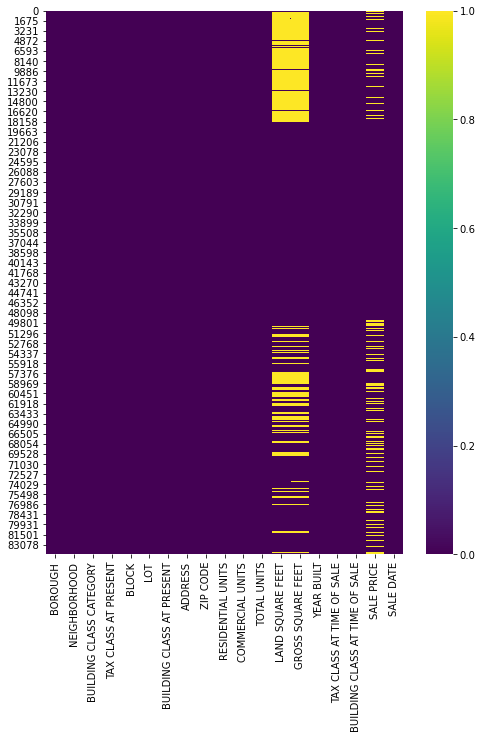

In [112]:
plt.figure(figsize=(8,10))
sns.heatmap(house_pricing_df.isnull(), cmap='viridis')

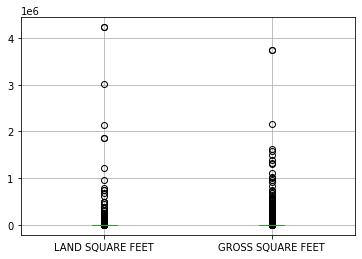

In [113]:
house_pricing_df.boxplot(column=['LAND SQUARE FEET', 'GROSS SQUARE FEET'])

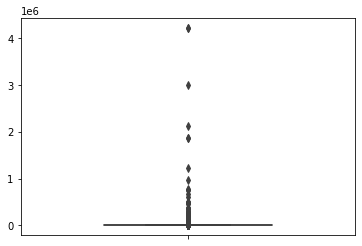

In [114]:
sns.boxplot(y=['LAND SQUARE FEET'], data=house_pricing_df, width=0.5)

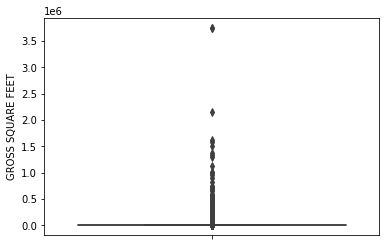

In [115]:
sns.boxplot(y='GROSS SQUARE FEET', data=house_pricing_df)

Land Square Feet and Gross Square Feet have around 29%-30% missing values. It also seems like both Land Square Feet and Gross Square Feet don't have normal distributions, so we'll be using the median to impute the values. 

In [116]:
house_pricing_df['LAND SQUARE FEET']

0          1633.0
1          4616.0
2          2212.0
3          2272.0
4          2369.0
           ...   
84543      2400.0
84544      2498.0
84545      4000.0
84546    208033.0
84547     10796.0
Name: LAND SQUARE FEET, Length: 76845, dtype: float64

In [117]:
house_pricing_df['GROSS SQUARE FEET']

0         6440.0
1        18690.0
2         7803.0
3         6794.0
4         4615.0
          ...   
84543     2575.0
84544     2377.0
84545     1496.0
84546    64117.0
84547     2400.0
Name: GROSS SQUARE FEET, Length: 76845, dtype: float64

In [118]:
house_pricing_df['LAND SQUARE FEET'].describe()

count    5.379300e+04
mean     3.608860e+03
std      3.484091e+04
min      0.000000e+00
25%      1.751000e+03
50%      2.375000e+03
75%      3.532000e+03
max      4.228300e+06
Name: LAND SQUARE FEET, dtype: float64

In [119]:
house_pricing_df['GROSS SQUARE FEET'].describe()

count    5.350100e+04
mean     4.096534e+03
std      3.574606e+04
min      0.000000e+00
25%      1.153000e+03
50%      1.760000e+03
75%      2.622000e+03
max      3.750565e+06
Name: GROSS SQUARE FEET, dtype: float64

In [120]:
house_pricing_df['LAND SQUARE FEET'].median()

2375.0

In [121]:
house_pricing_df['GROSS SQUARE FEET'].median()

1760.0

Replacing null values with median value

In [122]:
house_pricing_df['LAND SQUARE FEET'].fillna(house_pricing_df['LAND SQUARE FEET'].median(),inplace=True)

In [123]:
house_pricing_df['GROSS SQUARE FEET'].fillna(house_pricing_df['GROSS SQUARE FEET'].median(),inplace=True)

In [124]:
house_pricing_df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        12627
SALE DATE                             0
dtype: int64

In [125]:
house_pricing_df['LAND SQUARE FEET'].describe()

count    7.684500e+04
mean     3.238726e+03
std      2.915580e+04
min      0.000000e+00
25%      2.000000e+03
50%      2.375000e+03
75%      2.718000e+03
max      4.228300e+06
Name: LAND SQUARE FEET, dtype: float64

In [126]:
house_pricing_df['GROSS SQUARE FEET'].describe()

count    7.684500e+04
mean     3.386741e+03
std      2.984570e+04
min      0.000000e+00
25%      1.396000e+03
50%      1.760000e+03
75%      2.176000e+03
max      3.750565e+06
Name: GROSS SQUARE FEET, dtype: float64

In [127]:
house_pricing_df['SALE PRICE'].describe()

count    6.421800e+04
mean     1.266769e+06
std      1.168838e+07
min      0.000000e+00
25%      2.400000e+05
50%      5.300000e+05
75%      9.398400e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [128]:
house_pricing_df['SALE PRICE'].min()

0.0

In [129]:
house_pricing_df['SALE PRICE'].max()

2210000000.0

In [130]:
house_pricing_df['SALE PRICE'].mean()

1266769.0688436264

In [131]:
house_pricing_df['SALE PRICE'].median()

530000.0

In [132]:
house_pricing_df['SALE PRICE'].value_counts(ascending=True)

68000.0         1
291200.0        1
155575.0        1
5716144.0       1
714500.0        1
             ... 
650000.0      392
600000.0      393
450000.0      406
10.0          683
0.0          8962
Name: SALE PRICE, Length: 9369, dtype: int64

There are house prices less than $10 and we'll be dropping these data 

In [133]:
len(house_pricing_df[house_pricing_df['SALE PRICE'] < 10])

9065

In [153]:
house_pricing_df = house_pricing_df[house_pricing_df['SALE PRICE'] > 10]

In [154]:
house_pricing_df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [155]:
len(house_pricing_df)

54470

Missing sale price accounts to 16% of the data. Since sale price is the one we need to fully understand, it may be harder to verify the accuracy of the values and predictions. Therefore, we'll be deleting the sale prices which are null.

In [138]:
house_pricing_df = house_pricing_df[house_pricing_df['SALE PRICE'].notnull()]
len(house_pricing_df)

64218

In [161]:
len(house_pricing_df[house_pricing_df['COMMERCIAL UNITS'] == 0])

51780

In [157]:
house_pricing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BLOCK,54470.0,4.238256e+03,3.594447e+03,1.0,1331.0,3279.5,6243.75,1.631900e+04
LOT,54470.0,3.280315e+02,5.889987e+02,1.0,20.0,47.0,210.00,9.002000e+03
RESIDENTIAL UNITS,54470.0,1.785038e+00,1.464227e+01,0.0,0.0,1.0,2.00,1.844000e+03
COMMERCIAL UNITS,54470.0,1.662199e-01,1.011493e+01,0.0,0.0,0.0,0.00,2.261000e+03
TOTAL UNITS,54470.0,1.960786e+00,1.790695e+01,0.0,0.0,1.0,2.00,2.261000e+03
LAND SQUARE FEET,54470.0,3.012535e+03,2.664017e+04,0.0,2000.0,2375.0,2513.00,4.228300e+06
GROSS SQUARE FEET,54470.0,2.923865e+03,2.440591e+04,0.0,1344.0,1760.0,1925.00,3.750565e+06
SALE PRICE,54470.0,1.493471e+06,1.267791e+07,19.0,382000.0,630000.0,1050000.00,2.210000e+09


Summary so far:

1) Maximum of Block number is 16319

2) Maximum of Lot number is 9002

3) There are properties with 0 square feet. 

4) Minimum sale price is 19